In [38]:
import numpy as np
my_seed = 2017
np.random.seed(my_seed)

import random 
random.seed(my_seed)

In [39]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'SimHei'

In [40]:
data_set_name = "uk_data"

In [41]:
all_data = np.fromfile(data_set_name)

In [42]:
sequence_len = 10
X = []
Y = []
for i in range(len(all_data)-sequence_len):
    X.append(all_data[i:i+sequence_len])
    Y.append(all_data[i+sequence_len])
X = np.array(X)
Y = np.array(Y)

In [43]:
from sklearn.model_selection import train_test_split
# 默认shufft
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)

In [44]:
from sklearn import svm
SVR = svm.SVR()
SVR.fit(X_train, Y_train)
Y_predict = SVR.predict(X_test)

In [45]:
# 预测的值
Y_test_predict = Y_predict
# 真实值
Y_test_real =  Y_test

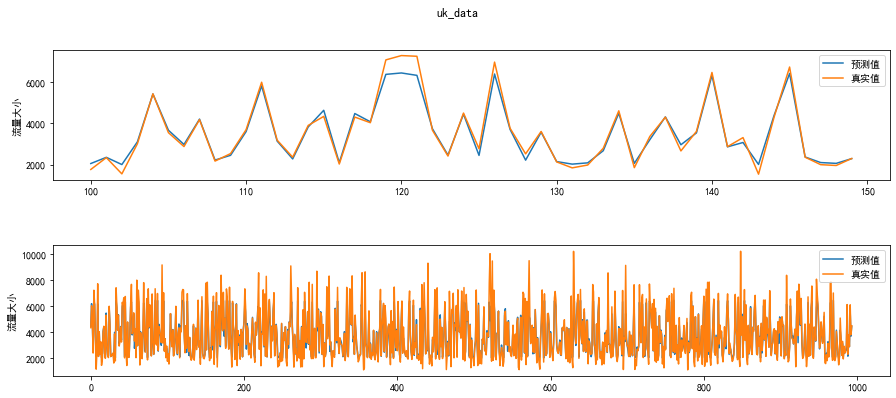

In [46]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle(data_set_name)

x = np.arange(100, 150, 1)
plt.subplots_adjust(wspace =0, hspace =0.5)#调整子图间距

plt.subplot(2,1,1)
plt.plot(x,Y_test_predict[100:150],label="预测值")
plt.plot(x,Y_test_real[100:150],label="真实值")
plt.ylabel('流量大小')

plt.legend(loc=1,ncol=1)

plt.subplot(2,1,2)
plt.ylabel('流量大小')
plt.plot(Y_test_predict,label="预测值")
plt.plot(Y_test_real,label="真实值")
#指定图例位置，1右上角，2左上角，3右下角，4左下角，0自动适应图像
# plt.legend(loc=0,ncol=1)
plt.legend(loc=1,ncol=1)

plt.savefig(data_set_name+"_svm_predict.png",dpi=400)

In [47]:
from sklearn.metrics import mean_squared_error as MSE

def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

    
print(f"根均方误差(RMSE)：{RMSE(Y_test_predict, Y_test_real)}")
print(f"平均绝对百分比误差(MAPE)：{MAPE(Y_test_predict, Y_test_real)}")


根均方误差(RMSE)：641.7730050071123
平均绝对百分比误差(MAPE)：0.08381466976621492
